In [8]:
from pathlib import Path
import seaborn as sns
import pandas as pd

In [9]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / ".." / "data"

In [10]:
def load_dataset(uri: str, readout_col: str):
    """ Loads the MoleculeNet dataset """
    df = pd.read_csv(uri)
    smiles = df["smiles"].values
    y = df[readout_col].values
    return smiles, y

In [11]:
smiles, y = load_dataset(DATA / "EGFR_compounds_lipinski.csv", "pIC50")

In [20]:
from molfeat.trans.graph.adj import PYGGraphTransformer
from molfeat.calc.atom import AtomCalculator
from molfeat.calc.bond import EdgeMatCalculator

featurizer = PYGGraphTransformer(
    atom_featurizer=AtomCalculator(), 
    bond_featurizer=EdgeMatCalculator()
)

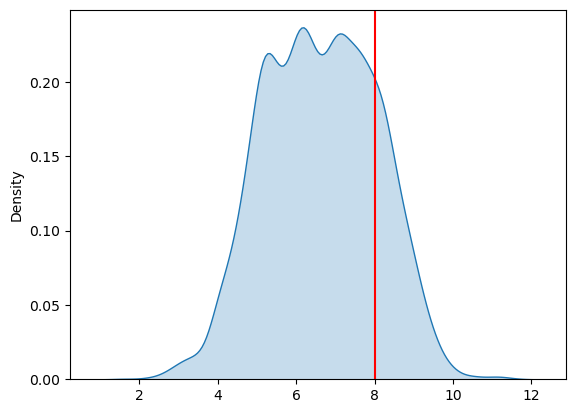

In [12]:
ax = sns.kdeplot(y, fill=True)
ax.axvline(x=8.0, color="red")

In [13]:
y_binarized = (y > 8.0).astype(int)

In [16]:
nb_positive = y_binarized.sum()
nb_negative = len(y) - nb_positive
nb_positive, nb_negative

(873, 3762)